* Author: Yi-Shin Lin and others
* Date: 14/08/2023
* License: GPL3
* Title: Fitting the data subset of the AGE scenario

In [35]:
import Model
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from IPython.display import Image
import Model_utility 
import os

In [ ]:
bias = "centre"
drift0 = 1.05
bound0 = 3.0
noise0 = 2.5
x0 = 0.0
dx = 0.01
dt = 0.01
max_time = 14.0
ndt = 0.30   # 300 ms non-decision time
method = "implicit"

# The probability of the system at the time step 0.
res = Model.test_get_starting_pdf(bias, drift0, bound0, noise0, x0, dx, dt, max_time)
print(res.T)
plt.plot(res)

In [3]:
drift0 = 1.05
noise0 = 2.5
bound0 = 3.0
dx = 0.01
dt = 0.01
max_time = 10.0

ndt = 0.30
dt = 0.01
x0 = -1.0
method = "implicit"
bias = "point"

result = Model.test_solve_numerical(method, bias, drift0, bound0, noise0, x0, dx, dt, max_time)

In [ ]:
Model_utility.plot_density(result, dt, ndt)

In [6]:
df = pd.read_csv('data/age_text1.csv')
RT = df['RT'].to_numpy()
R = df['R'].to_numpy()
df.head()

RT  R  A  s Scenario_Type
0  5.664  1  1  1          Text
1  1.898  1  1  1          Text
2  3.164  1  1  1          Text
3  1.730  1  1  1          Text
4  2.163  1  1  1          Text

In [7]:
def objective_function(x):
    v0 = x[0]
    b0 = x[1]
    ndt = x[2]
    
    # These three paraemters are just assumptions. You should treat them as the tuning parameters and 
    # search for the best ones, using the method, e.g., those found in a machine-learning textbook. 
    x0 = 0.0
    s0 = 1.5
    dx = 0.01
    dt = 0.01
    max_time = 14.0
    bias = "centre"
    method = "implicit"

    estimated_pdf = Model.test_solve_numerical(method, bias, v0, b0, s0, x0, dx, dt, max_time)
    res = Model_utility.calculate_LL(RT, R, estimated_pdf, dt, ndt)
    
    # Write the value of res to a file
    with open('data/likelihood_output.txt', 'a') as f:
        f.write(str(res) + '\n')

    return res
  

def callback(xk):
    # Print out the parameter estimates at every step
    with open('data/estimate_output.txt', 'a') as f:
        f.write(str(xk) + '\n')
    print(xk)


In [8]:
os.getcwd()

'/media/yslin/kakapu/02_Projects/Multi-choices_Github/tests/Model_Age_old'

In [9]:
x0 = [0.5, 0.5, 0.5]  # Initial guess for the parameters
res1 = minimize(objective_function, x0, method='Nelder-Mead', options={'maxiter': 30}, callback=callback)

[0.5   0.525 0.5  ]
[0.475      0.54166667 0.54166667]
[0.45       0.58333333 0.50833333]
[0.475      0.61666667 0.51666667]
[0.4        0.69166667 0.56666667]
[0.375      0.80833333 0.50833333]
[0.35  0.95  0.575]
[0.175      1.21666667 0.61666667]
[0.1        1.59166667 0.56666667]
[-0.125       2.14166667  0.74166667]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.55   3.05   0.775]
[-0.46018519  2.95146605  0.78016975]
[-0.46018519  2.95146605  0.78016975]
[-0.46018519  2.95146605  0.78016975]
[-0.45075446  2.88243884  0.81975023]
[-0.45075446  2.88243884  0.81975023]
[-0.45075446  2.88243884  0.81975023]
[-0.41664952  2.99768447  0.84664709]
[-0.41664952  2.99768447  0.84664709]
[-0.41664952  2.99768447  0.84664709]
[-0.41664952  2.99768447  0.84664709]
[-0.43234447  2.95366298  0.87893591]
[-0.43234447  2.95366298  0.87893591]
[-0.43234447  2.95366298  0.87893591]
[-0.43234447  2.95366298  0.87893591]


The subset of data in the AGE scenario that used young and old pedestrians. 

In [11]:
df = pd.read_csv('data/age_text2.csv')

RT = df['RT'].to_numpy()
R = df['R'].to_numpy()
# df.head()

proportions = df['R'].value_counts(normalize=True)
proportions[0]

0.35947712418300654

In [12]:
x0 = [0.5, 0.5, 0.5]  # Initial guess for the parameters
res2 = minimize(objective_function, x0, method='Nelder-Mead', options={'maxiter': 30}, callback=callback)

[0.5   0.525 0.5  ]
[0.475      0.54166667 0.54166667]
[0.475      0.54166667 0.54166667]
[0.49166667 0.58888889 0.52222222]
[0.43333333 0.63611111 0.57777778]
[0.43333333 0.63611111 0.57777778]
[0.44166667 0.76388889 0.59722222]
[0.35833333 0.84444444 0.71111111]
[0.3   1.    0.725]
[0.23333333 1.33611111 0.87777778]
[0.00833333 1.65277778 1.11944444]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.175  2.3    1.3  ]
[-0.14125895  2.25842113  1.25820489]
[-0.20119265  2.46322318  1.30104421]
[-0.17042499  2.32463092  1.25878285]
[-0.1689383   2.37313762  1.25901598]
[-0.1689383   2.37313762  1.25901598]
[-0.1689383   2.37313762  1.25901598]
[-0.1689383   2.37313762  1.25901598]
[-0.1689383   2.37313762  1.25901598]


In [ ]:
Image(filename='./images/age1.png', width=700)

In [ ]:
Image(filename='./images/age2.png', width=700) 

In [13]:
v0 = res1.x[0]  # -0.41
b0 = res1.x[1]  # 3.15

x0 = 0.0
s0 = 1.5
dx = 0.01
dt = 0.01
max_time = 14.0
bias = "centre"
method = "implicit"
model_age1 = Model.test_solve_numerical(method, bias, v0, b0, s0, x0, dx, dt, max_time)

v0 = res2.x[0]  # -0.4117
b0 = res2.x[1]  # 2.49
model_age2 = Model.test_solve_numerical(method, bias, v0, b0, s0, x0, dx, dt, max_time)

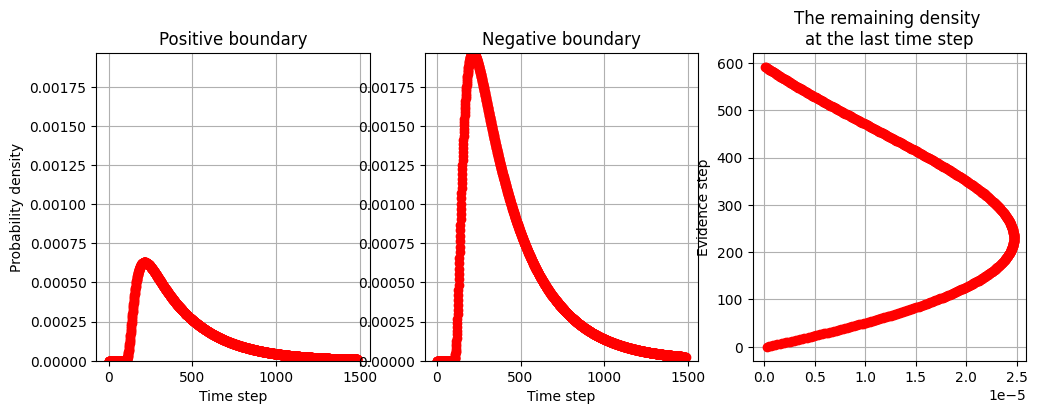

In [14]:
ndt1 = res1.x[2] # 0.84 
Model_utility.plot_density(model_age1, dt, ndt1)

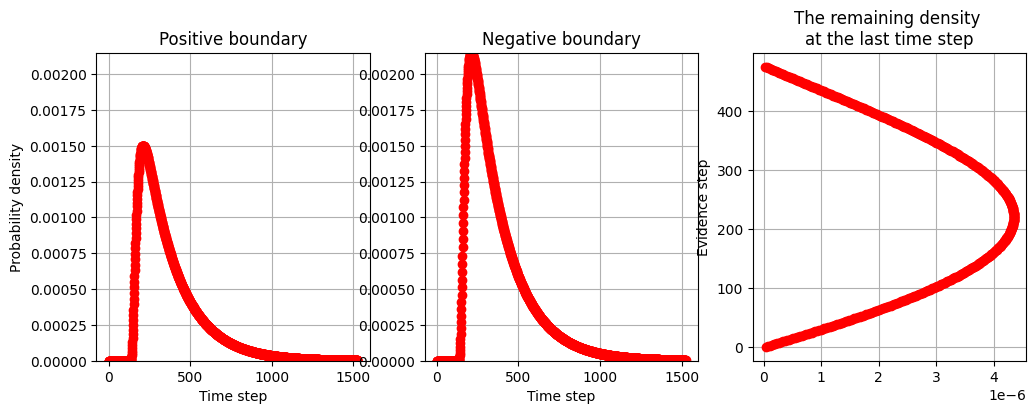

In [15]:
ndt2 = res2.x[2] # 1.26 
Model_utility.plot_density(model_age2, dt, ndt2)


In [26]:
dt = 0.01
df_age1 = pd.read_csv('data/age_text1.csv')
n = len(df_age1)
# print(n)
df_age1.head()

RT  R  A  s Scenario_Type
0  5.664  1  1  1          Text
1  1.898  1  1  1          Text
2  3.164  1  1  1          Text
3  1.730  1  1  1          Text
4  2.163  1  1  1          Text

In [27]:
df_age1.rename(columns={'R': 'TrueR'}, inplace=True)
df_age1.head()


RT  TrueR  A  s Scenario_Type
0  5.664      1  1  1          Text
1  1.898      1  1  1          Text
2  3.164      1  1  1          Text
3  1.730      1  1  1          Text
4  2.163      1  1  1          Text

In [28]:
sim_age1 = Model_utility.simulate(model_age1, df_age1, dt, ndt1)

Total probability:  0.9999999999976824
Probability of hitting the positive boundary 0.24
Probability of hitting the negative boundary 0.751
Remaining probability at the last time step 0.009
The data showed the probability of hitting the positive boundary 0.25
The data showed the probability of hitting the negative boundary 0.75


In [29]:
df_age2 = pd.read_csv('data/age_text2.csv')
df_age2.rename(columns={'R': 'TrueR'}, inplace=True)

sim_age2 = Model_utility.simulate(model_age2, df_age2, dt, ndt2)

Total probability:  0.9999999999982221
Probability of hitting the positive boundary 0.411
Probability of hitting the negative boundary 0.588
Remaining probability at the last time step 0.001
The data showed the probability of hitting the positive boundary 0.359
The data showed the probability of hitting the negative boundary 0.641


In [30]:
# Check the compartibility of the number of trials in the data and the simulation. 
print("n1", len(sim_age1[0]))
print("n2", len(sim_age2[0]))

n1 220
n2 153


In [31]:
df1 = pd.DataFrame({'RT': sim_age1[1] , 'R': sim_age1[0]})
df2 = pd.DataFrame({'RT': sim_age2[1] , 'R': sim_age2[0]})
df1.to_csv('data/age_text1_simulation.csv', index=False)
df2.to_csv('data/age_text2_simulation.csv', index=False)

In [38]:
def plot_rt_histogram(df1, df2, binsize=50):
    # Create a boolean mask for rows where 'R' is 0
    mask0 = df1['TrueR'] == 0
    mask1 = df2['R'] == 0

    # Create a boolean mask for rows where 'R' is 1
    mask2 = df1['TrueR'] == 1
    mask3 = df2['R'] == 1

    # Use the boolean masks to extract the 'RT' values for each category of 'R'
    RT0 = df1.loc[mask0, 'RT']
    RT1 = df2.loc[mask1, 'RT']
    RT2 = df1.loc[mask2, 'RT']
    RT3 = df2.loc[mask3, 'RT']

    # Plot the histograms of the 'RT' values for each category of 'R'
    plt.hist(RT0, bins=binsize, alpha=0.5, label='Data R=0', color='blue')
    plt.hist(RT1, bins=binsize, alpha=0.5, label='Simulation R=0', color='red')
    plt.hist(RT2, bins=binsize, alpha=0.5, label='Data R=1', color='green')
    plt.hist(RT3, bins=binsize, alpha=0.5, label='Simulation R=1', color='orange')
    
    plt.xlabel('RT')
    plt.ylabel('Frequency')
    plt.title('By Category of R')
    plt.legend()
    plt.show()


In [ ]:
plot_rt_histogram(df_age1, df1)

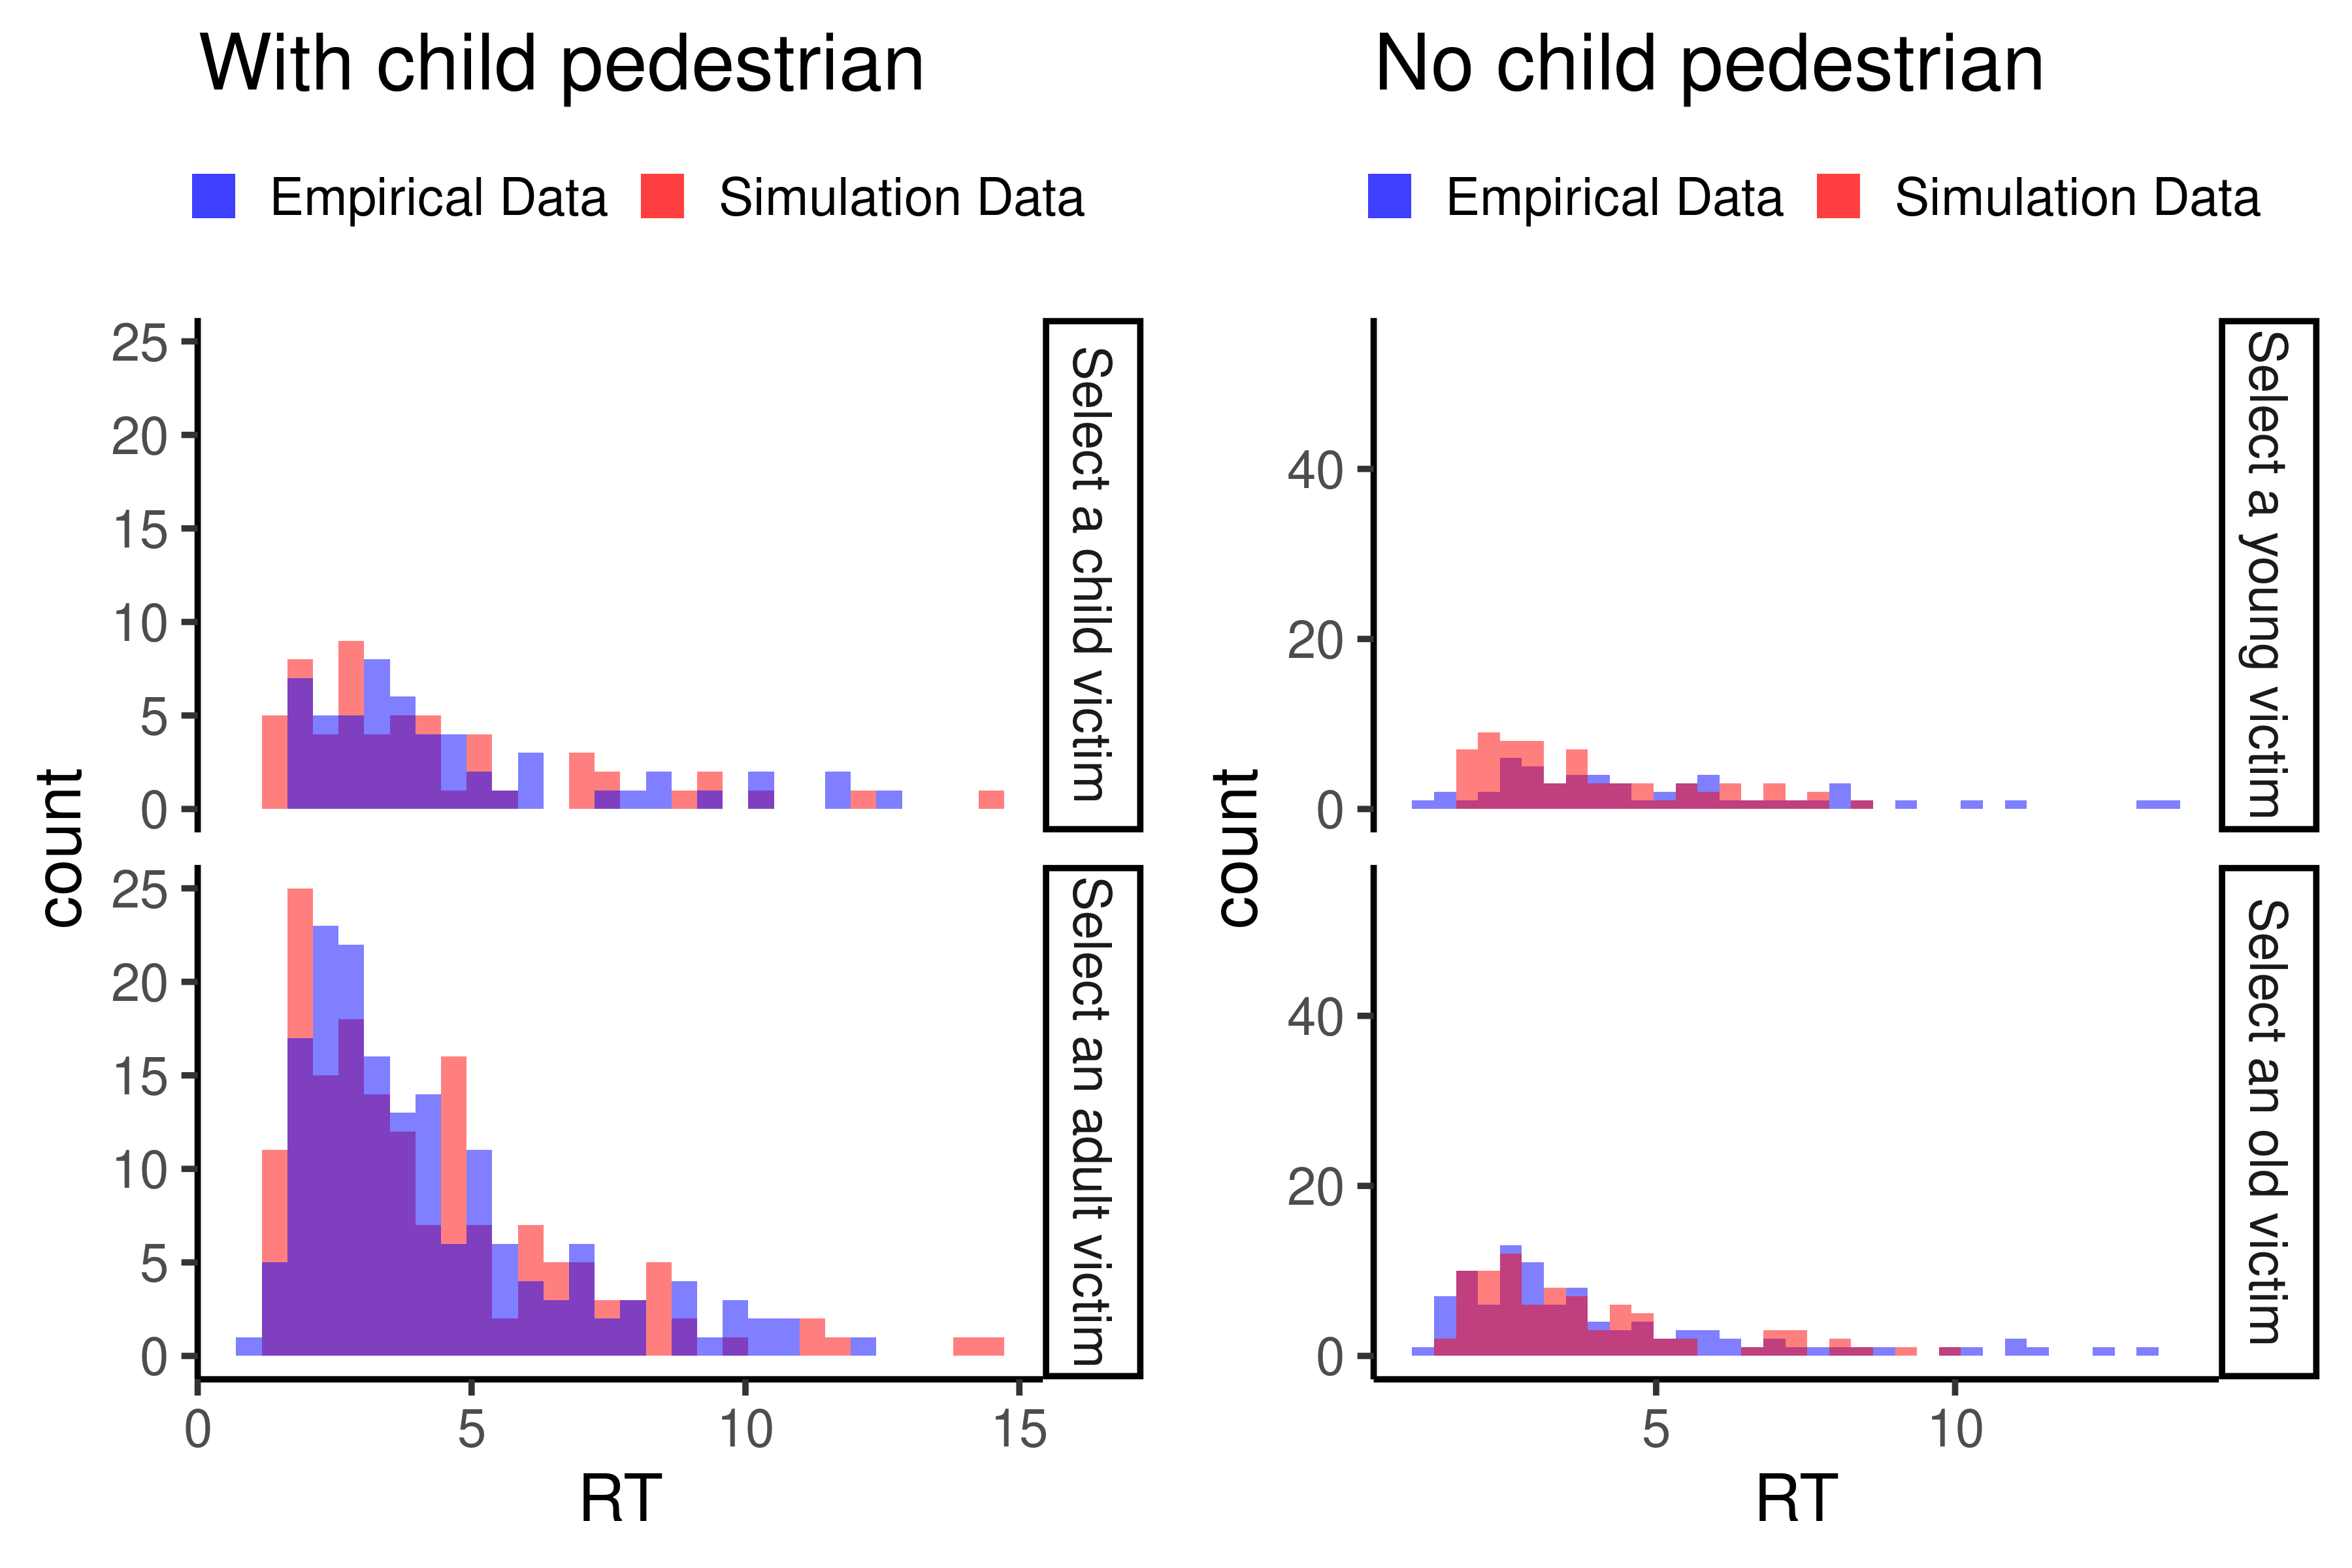

In [34]:
Image(filename='./images/age_text.png', width=700) 

In [36]:
df_age1 = pd.read_csv('data/age_video1.csv')
RT = df_age1['RT'].to_numpy()
R = df_age1['R'].to_numpy()

# plot_rt_histogram(df_age1, df1)

In [ ]:
sim_age1 = pd.read_csv('data/age_video1_simulation.csv')
sim_age2 = pd.read_csv('data/age_video2_simulation.csv')


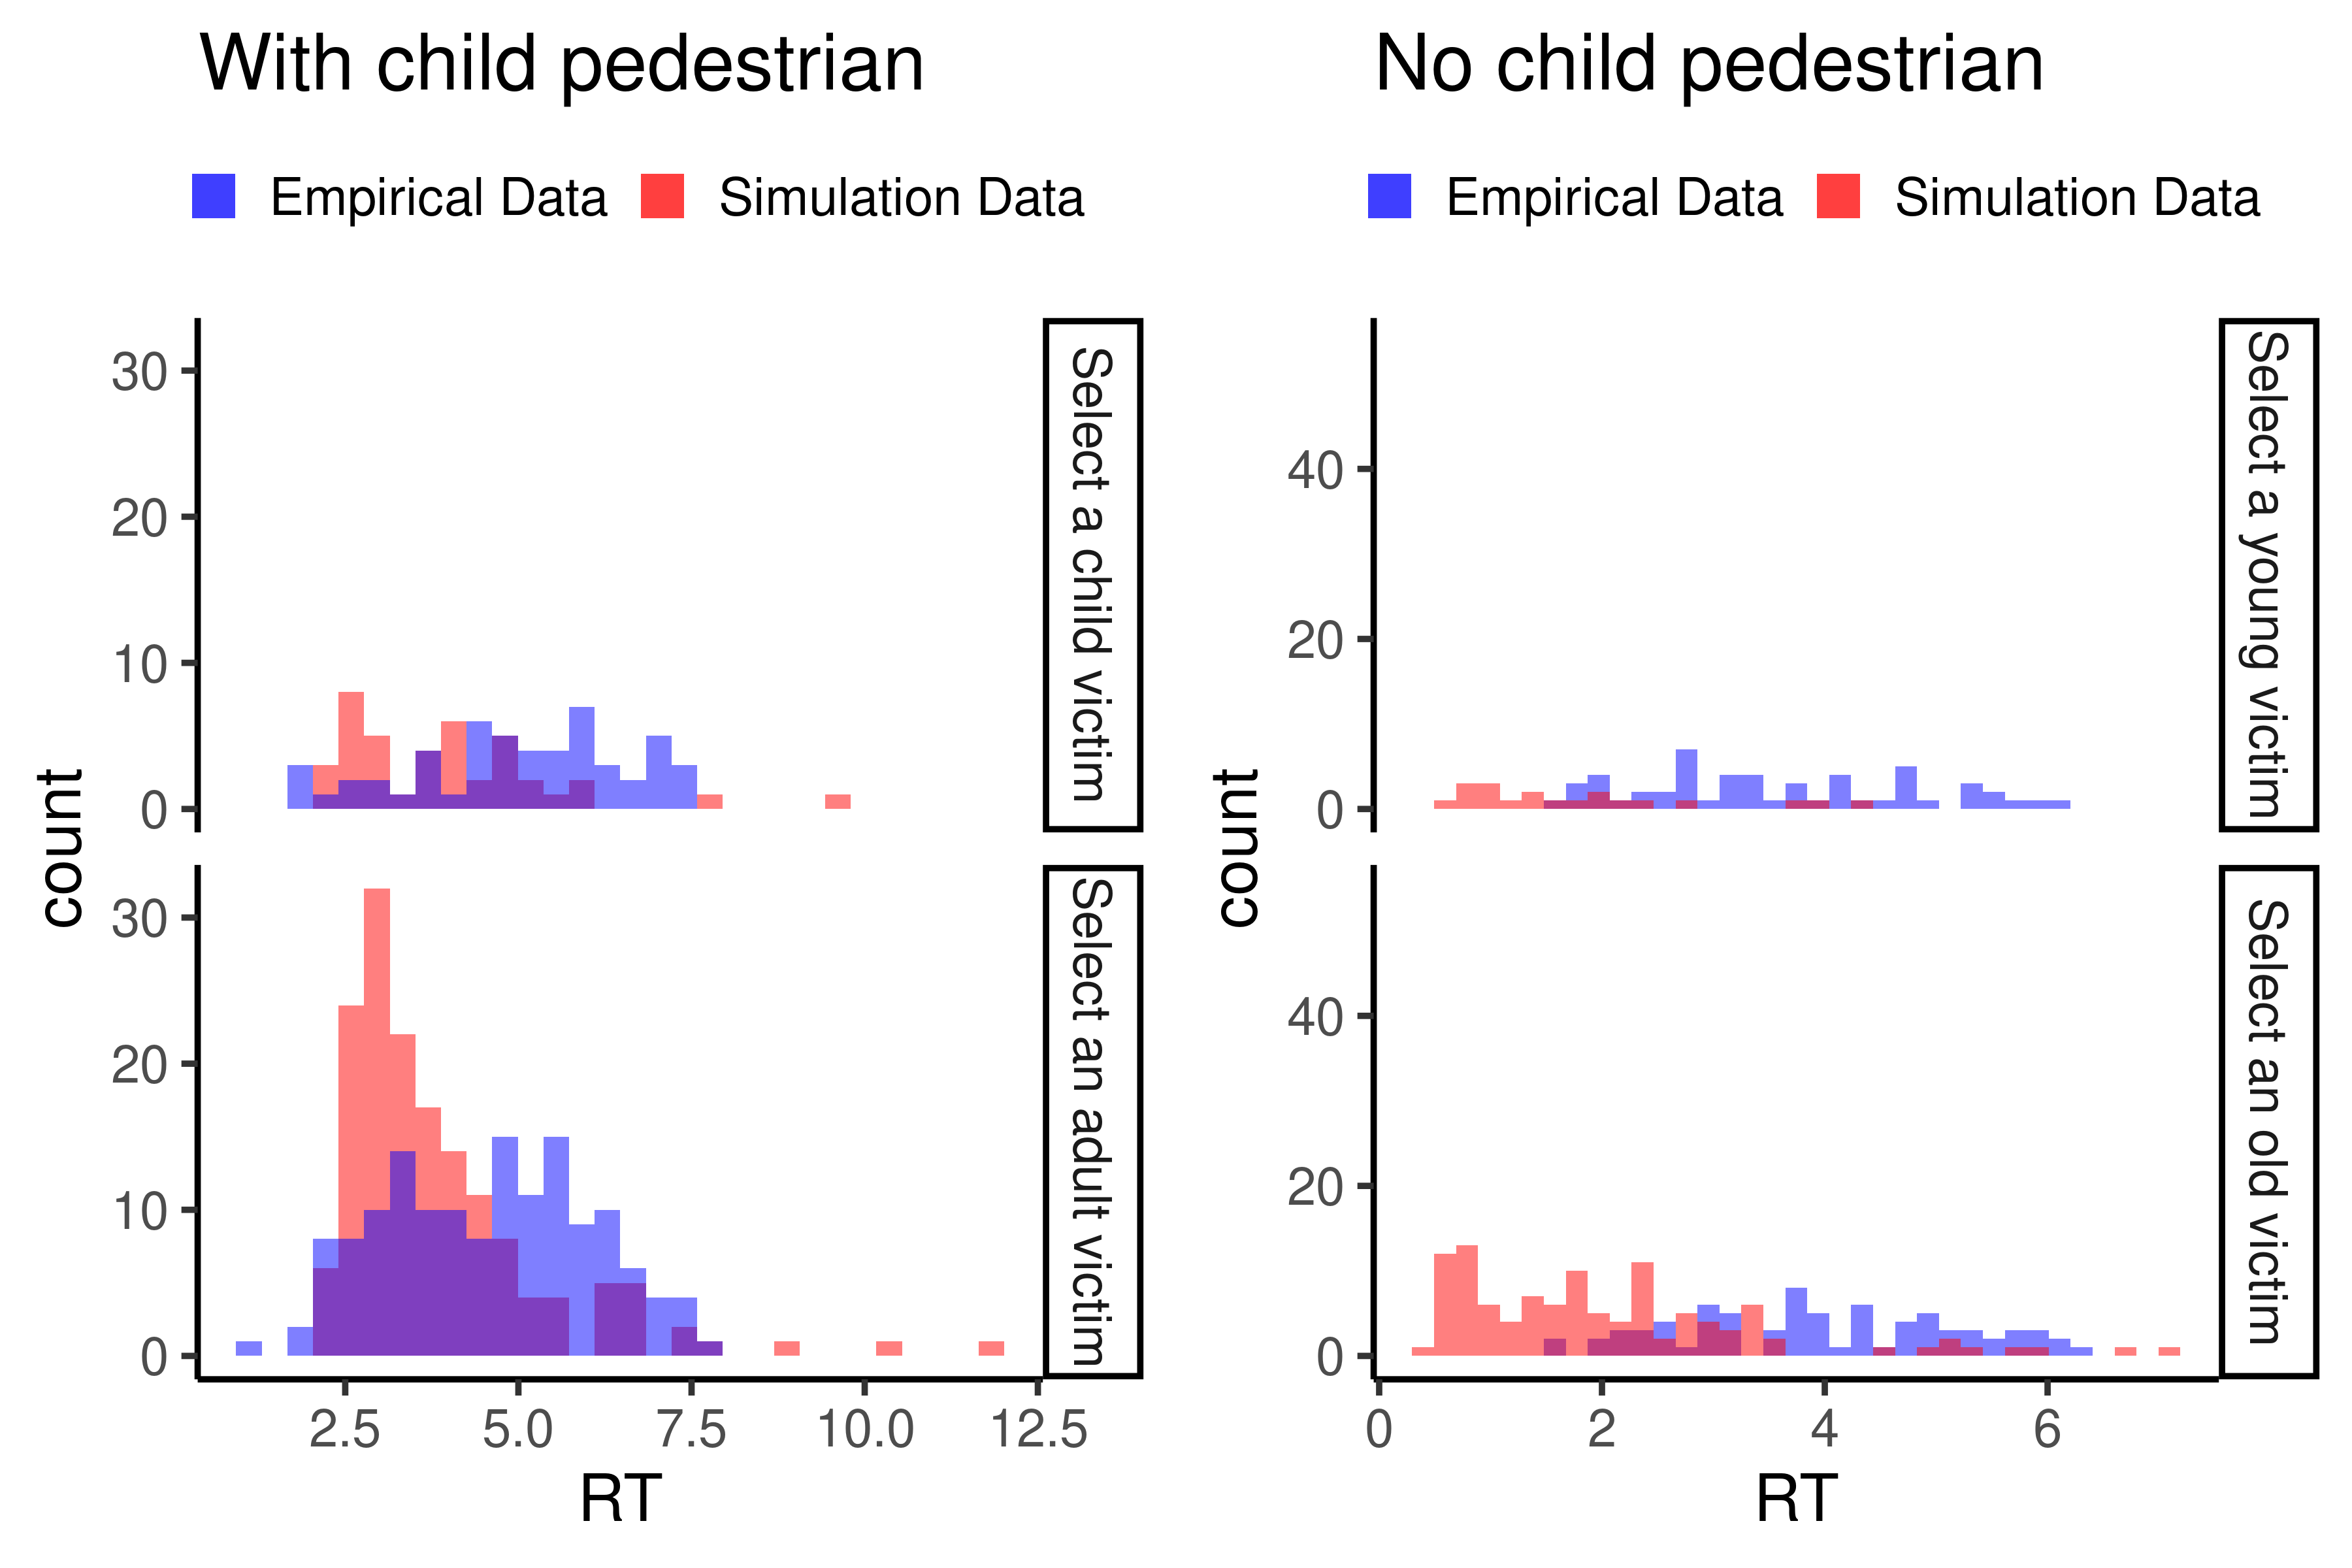

In [52]:
Image(filename='./images/age_video.png', width=700) 